<a href="https://colab.research.google.com/github/Hosnol/02_praktikum_web_lanjut_dua/blob/master/Pertemuan_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive #akses folder googgle drive
drive.mount('/content/drive') 

Mounted at /content/drive


In [2]:
import cv2 as cv #memanggil library cv2 yaitu OpenCV.
from google.colab.patches import cv2_imshow  #untuk menampilkan gambar
from skimage import io #untuk melakukan pemrosesan gambar
import matplotlib.pyplot as plt #memanggil library matplotlib untuk menvisualisasi data
import numpy as np #memanggil library numpy untuk manipulasi array

# Membuat Gamma Corection
Pada percobaan ini, nilai Gamma akan diset dengan meminta masukan dari pengguna.

 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma: 3


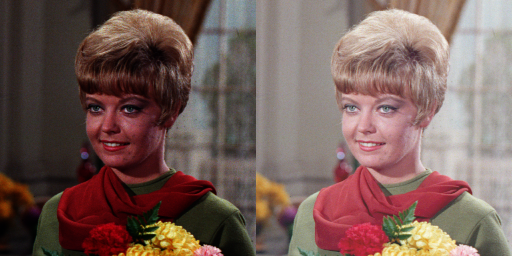

In [3]:
print(' Gamma Correction pada citra ')
print('----------------------------------')
try:    
    gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
    print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/Images/female.tiff') #membaca (load) file ‘female.tiff’ yang kemudian disimpan di variabel sementara bernama original.
invGamma = 1/gamma
tabel = [(( i / 255) ** invGamma) * 255 for i in range(256)] #Nilai piksel gambar dikonversi dari rentang [0, 255] hingga [0, 1.0
tabel = np.array(tabel, np.uint8) #nilai dikonversi kembali ke kisaran [0, 255]
gammaCorrection = cv.LUT(original, tabel) #memetakan nilai piksel input ke nilai output, Untuk setiap nilai piksel dalam rentang [0, 255] dihitung nilai koreksi gamma yang sesuai

final_frame = cv.hconcat((original, gammaCorrection))
cv2_imshow(final_frame)

# Membuat Simulasi Image Depth
Percobaan ini digunakan sebagai simulasi dari proses kuantisasi citra. Pada kuantisasi citra,
pixel dapat direpresentasikan dengan n-bit kedalaman (default menggunakan 8-bit). Pada
pixel 8-bit, warna yang memungkinkan adalah 256 warna, dari 0 (0000 0000) hingga
255(1111 1111). Pada pixel 7-bit, warna yang memungkinkan adalah 128 warna, dari 0 (000
0000) hingga 127 (111 1111). Kemungkinan warna didapat dari pangkat 2 jumlah bit. Jika
7bit, maka jumlah warnanya adalah 2
 = 128, dst. Karena Visual Studio 2017 bekerja hanya
pada 8 bit, maka percobaan ini hanya memanipulasi warna sehingga jumlah warnanya
sesuai dengan kedalamannya. Untuk kasus 7-bit, maka dua warna 8-bit diwakili oleh satu
warna 7-bit. Contoh pixel warna 0 dan 1 pada 8-bit, diwakili oleh warna 0 pada 7-bit. pixel
warna 2 dan 3 pada 8-bit, diwakili oleh warna 1 pada 7-bit, dst.

 Bit dept pada citra 
---------------------
Masukkan nilai bit_dept: 3


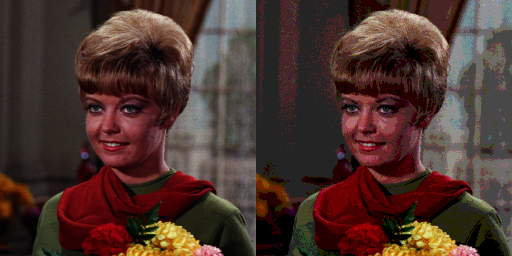

In [4]:
print(' Bit dept pada citra ')
print('---------------------')
try:    
    bitDept = int(input('Masukkan nilai bit_dept: '))
except ValueError:
    print('Error, not a number')

gamma_image = np.zeros(original.shape, original.dtype)

bit = 2**bitDept
level = 255 / (bit - 1)

#akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
     gamma_image[y,x,c] = np.clip(round(original[y,x,c] / level) * level, 0, 255);

final_frame = cv.hconcat((original, gamma_image))
cv2_imshow(final_frame)


# Membuat modul Average Denoising
Membuat modul average denoising sesuai dengan rumus yang telah diberikan pada sub bab sebelumnya.

Nilai PSNR adalah 27.538766903226907 (dB)


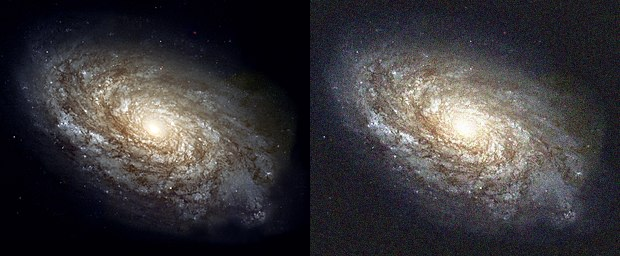

In [5]:
#No 3.1 (citra: 5)

import glob
from math import log10, sqrt
  
galaxy = cv.imread('/content/drive/MyDrive/Images/galaxy.jpg')
cv_img = []
for img in glob.glob('/content/drive/MyDrive/Images/noises/*.jpg'):
    n = cv.imread(img)
    cv_img.append(n)

dst = cv_img[0]
noise_number = 4 # nomor (array) gambar pada folder noises
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

def PSNR(galaxy, compressed): #fungsi perhitungan PNSR
    mse = np.mean((galaxy - compressed) ** 2)
    if(mse == 0):  # MSE nol berarti tidak ada noise sama sekali, sehingga PSNR tidak memiliki arti
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

compressed = dst
psnr = PSNR(galaxy, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
final_frame = cv.hconcat((galaxy, dst))
cv2_imshow(final_frame)

Nilai PSNR adalah 27.523072608731006 (dB)


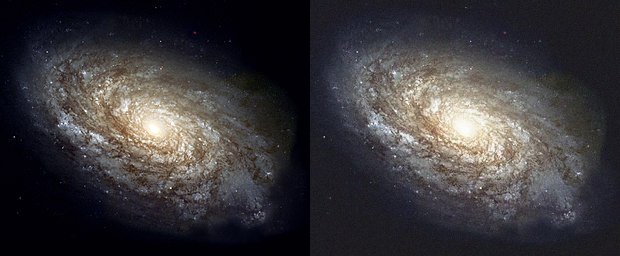

In [6]:
#No. 3.2 (citra: 30)

dst = cv_img[0]
noise_number = 29 # nomor array gambar pada folder noises
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

compressed = dst
psnr = PSNR(galaxy, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
final_frame = cv.hconcat((galaxy, dst))
cv2_imshow(final_frame)

Nilai PSNR adalah 27.487297426403792 (dB)


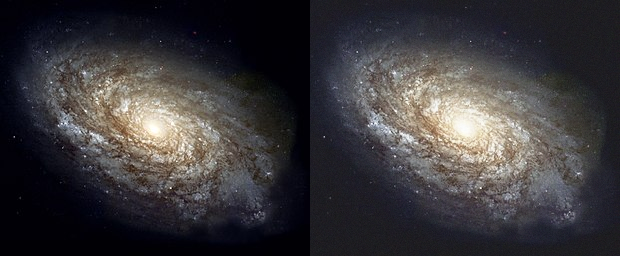

In [7]:
#No. 3.3 (citra: 60)

dst = cv_img[0]
noise_number = 59 # nomor (array) gambar pada folder noises
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

compressed = dst
psnr = PSNR(galaxy, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
final_frame = cv.hconcat((galaxy, dst))
cv2_imshow(final_frame)

Nilai PSNR adalah 27.509363943086505 (dB)


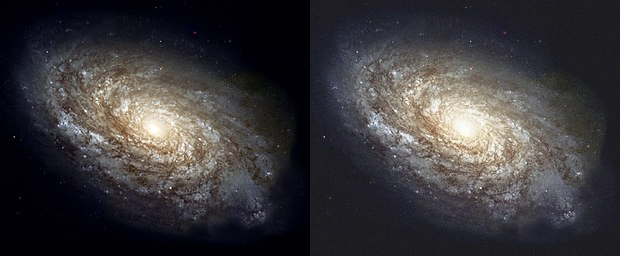

In [8]:
#No. 3.4 (citra: 80)

dst = cv_img[0]
noise_number = 79 # nomor (array) gambar pada folder noises
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

compressed = dst
psnr = PSNR(galaxy, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
final_frame = cv.hconcat((galaxy, dst))
cv2_imshow(final_frame)

Nilai PSNR adalah 27.514163030108627 (dB)


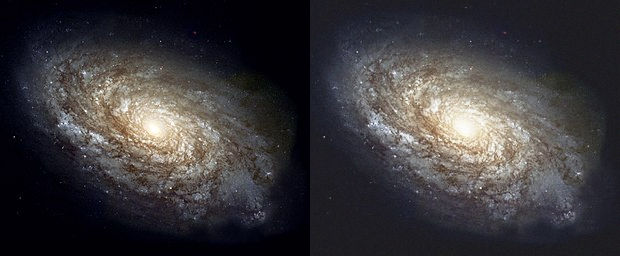

In [ ]:
#No 3.5 (citra: 100)

dst = cv_img[0]
noise_number = 99 # nomor (array) gambar pada folder noises
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

compressed = dst
psnr = PSNR(galaxy, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
final_frame = cv.hconcat((galaxy, dst))
cv2_imshow(final_frame)

# Membuat image masking 
Image kiri adalah image asli (images/teeth.jpg), sedangkan image kanan adalah hasilnya:

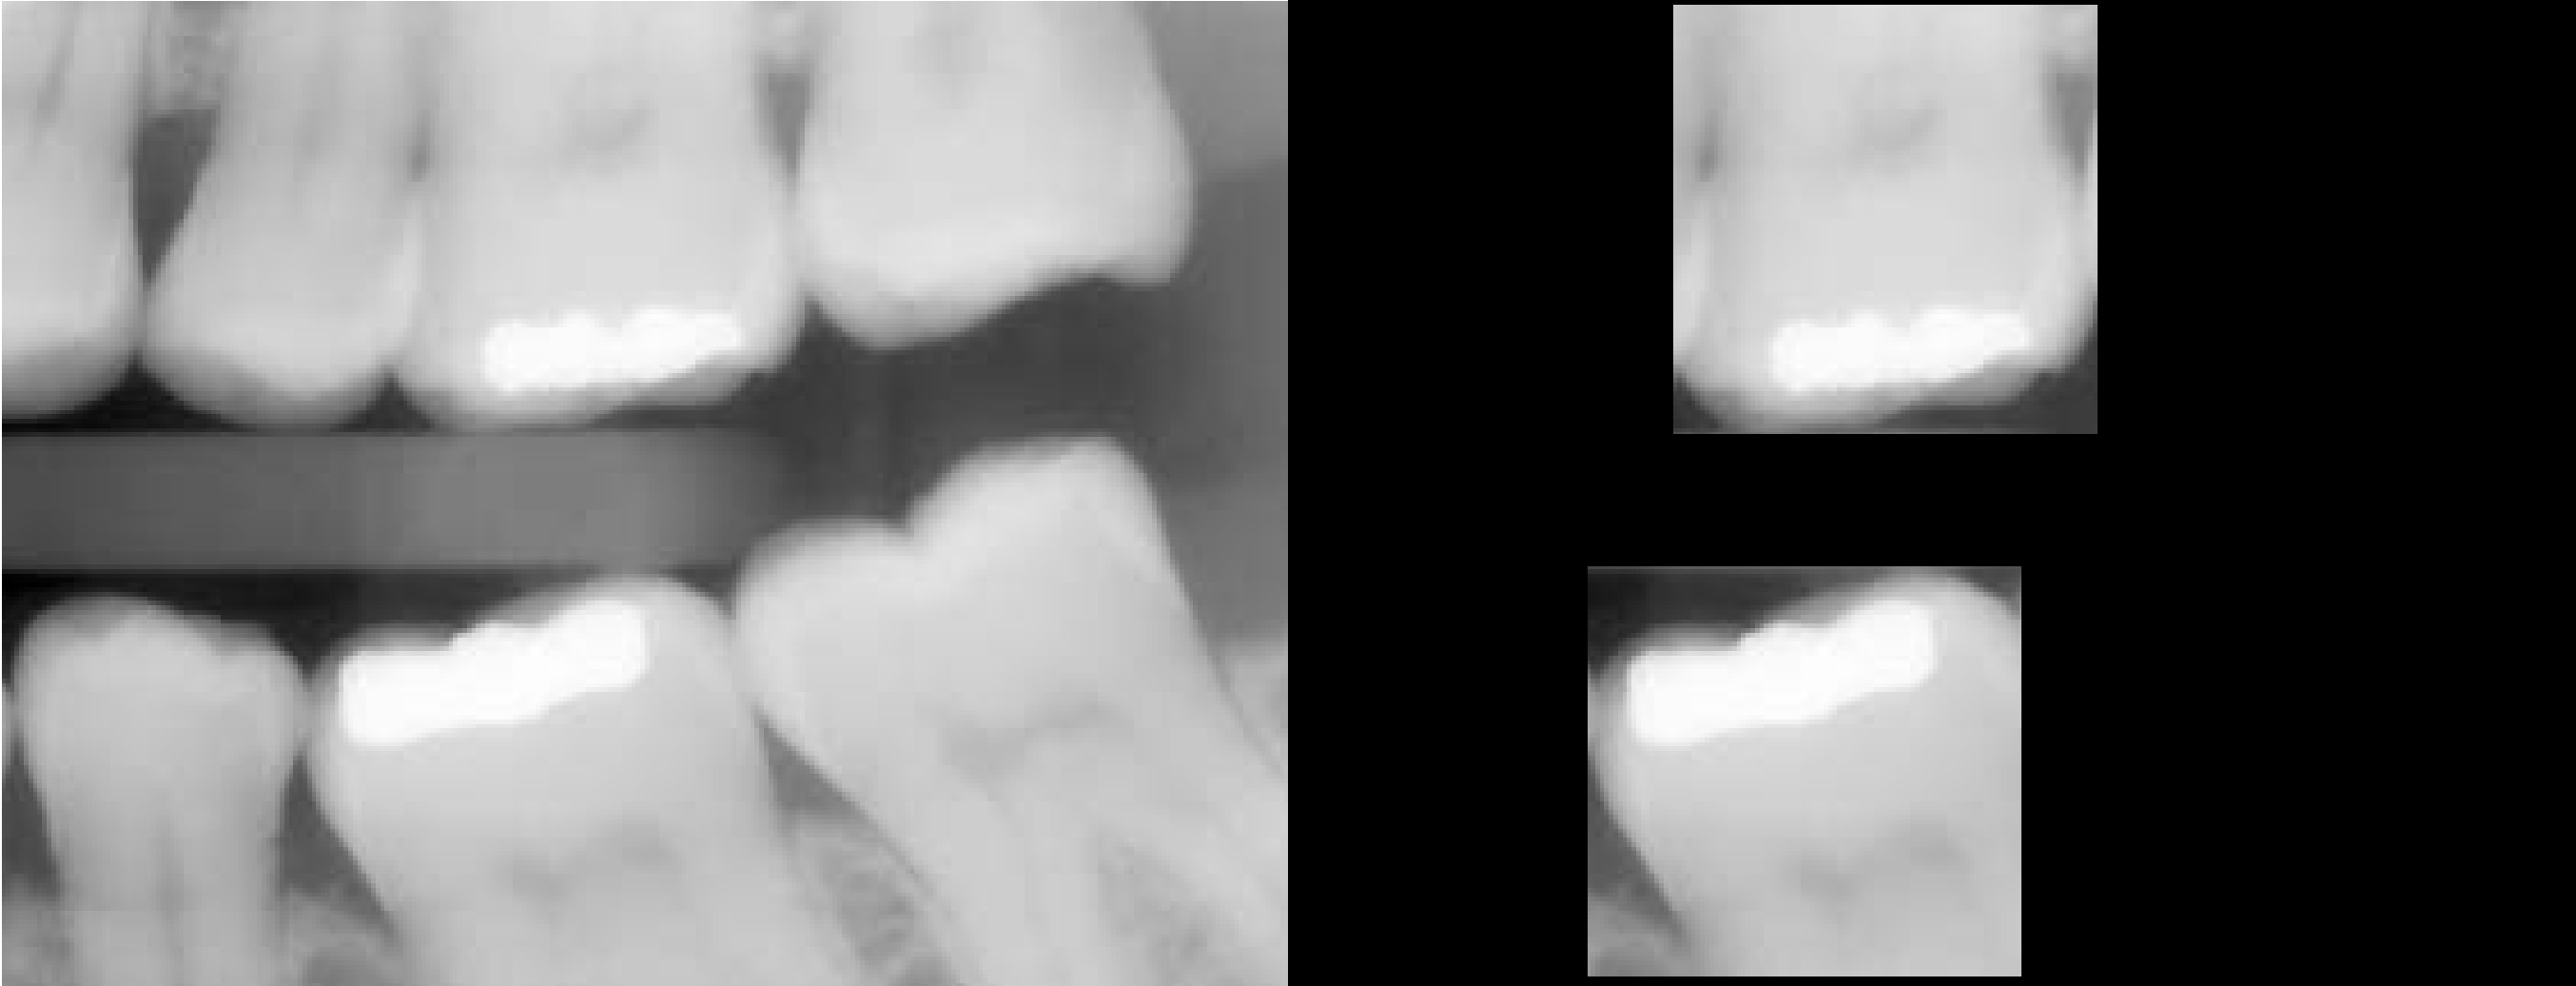

In [12]:
teeth = cv.imread('/content/drive/MyDrive/Images/teeth.jpg')

mask = np.zeros(teeth.shape, dtype=np.uint8)
mask = cv.rectangle(mask,pt1=(315,595),pt2=(770,1025),color=(255,255,255),thickness=-1) #masking untuk teeth bawah

result = teeth & mask

mask1 = cv.rectangle(mask,pt1=(405,5),pt2=(850,455),color=(255,255,255),thickness=-1) #masking untuk teeth atas

result = teeth & mask1 #masking untuk teeth atas

final_frame = cv.hconcat((teeth, result))
cv2_imshow(final_frame)

# Operasi Boolean
Lakukan percobaan menggunakan operator lain dan tunjukkan hasilnya pada modul ini.Tuliskan hasil analisa anda kenapa citra keluarannya seperti itu.

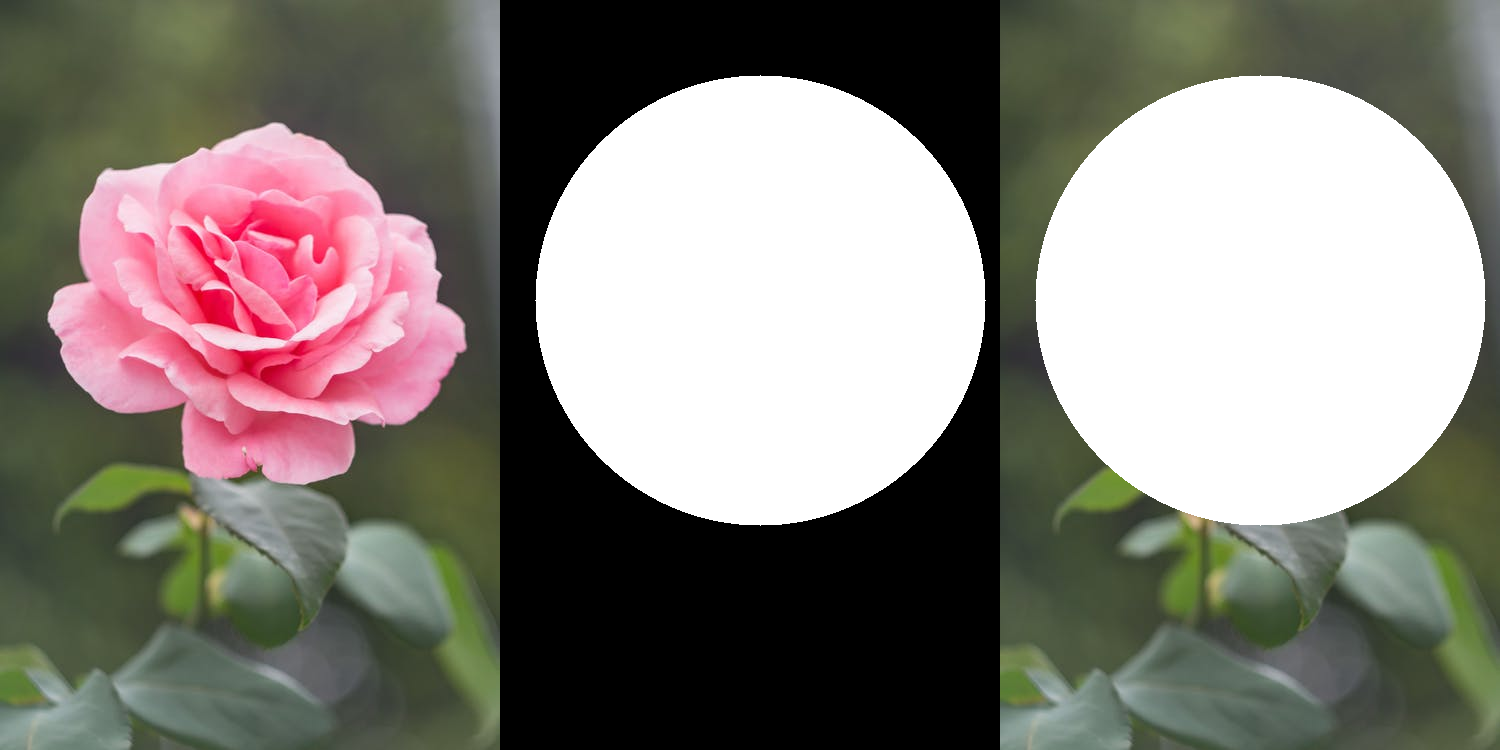

In [17]:
rose = cv.imread('/content/drive/MyDrive/Images/rose_pink.png')

mask = np.zeros(rose.shape, dtype=np.uint8)
mask = cv.circle(mask, (260, 300), 225, (255,255,255), -1)

border = rose | mask ##Operator OR

final_frame = cv.hconcat((rose, mask, border))
cv2_imshow(final_frame)

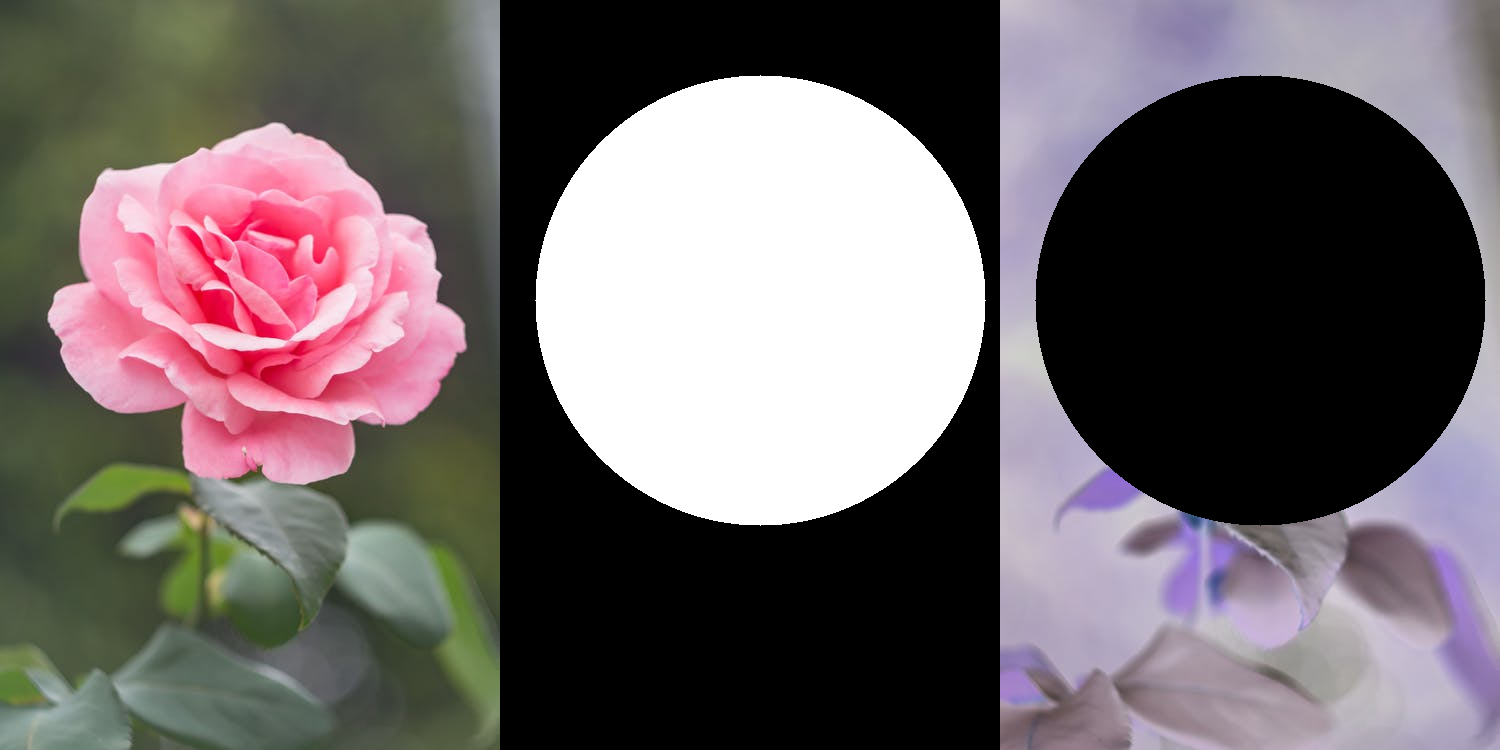

In [18]:
mask = np.zeros(rose.shape, dtype=np.uint8)
mask = cv.circle(mask, (260, 300), 225, (255,255,255), -1)

border = ~rose & ~mask #operator NOT

final_frame = cv.hconcat((rose, mask, border))
cv2_imshow(final_frame)

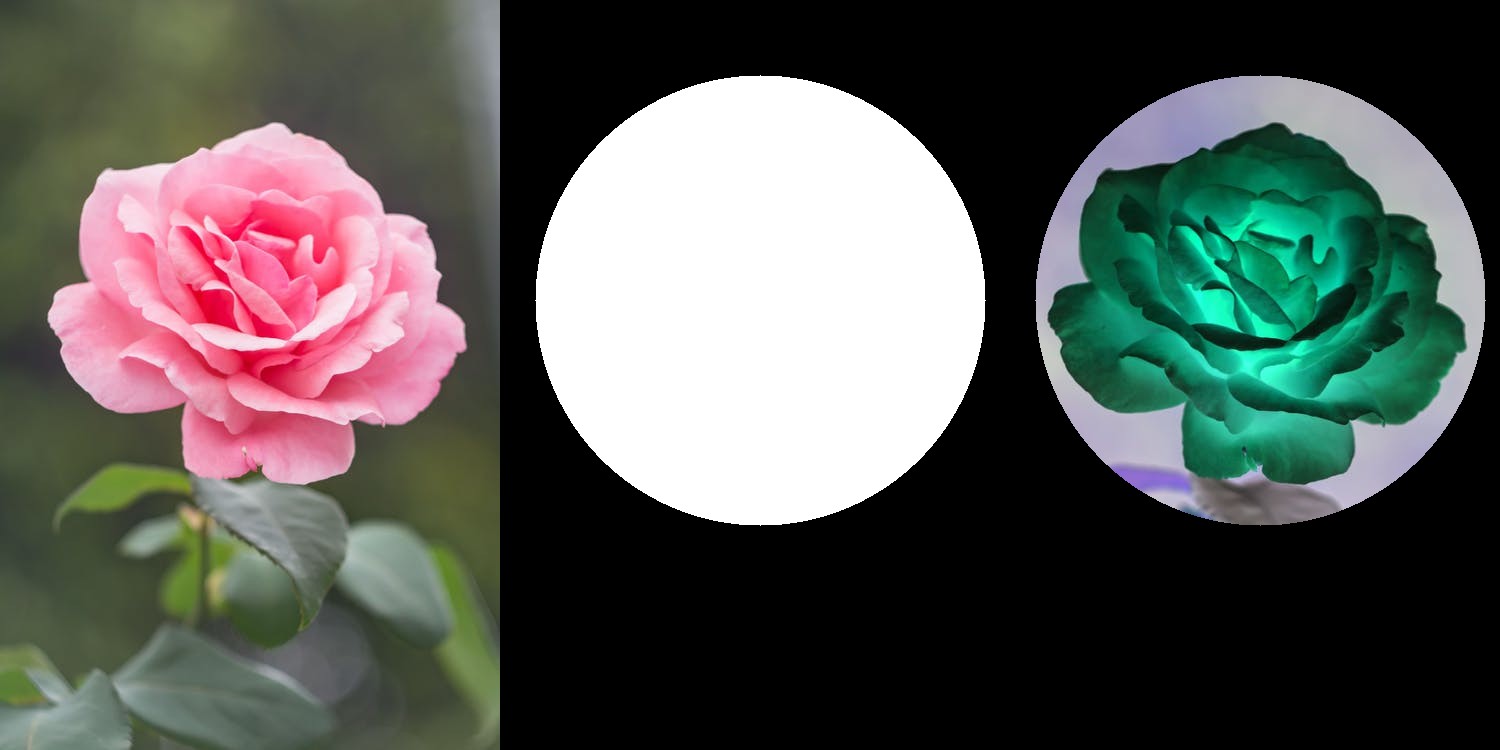

In [19]:
mask = np.zeros(rose.shape, dtype=np.uint8)
mask = cv.circle(mask, (260, 300), 225, (255,255,255), -1)

border = ~rose & mask #NAND atau NOT AND

final_frame = cv.hconcat((rose, mask, border))
cv2_imshow(final_frame)

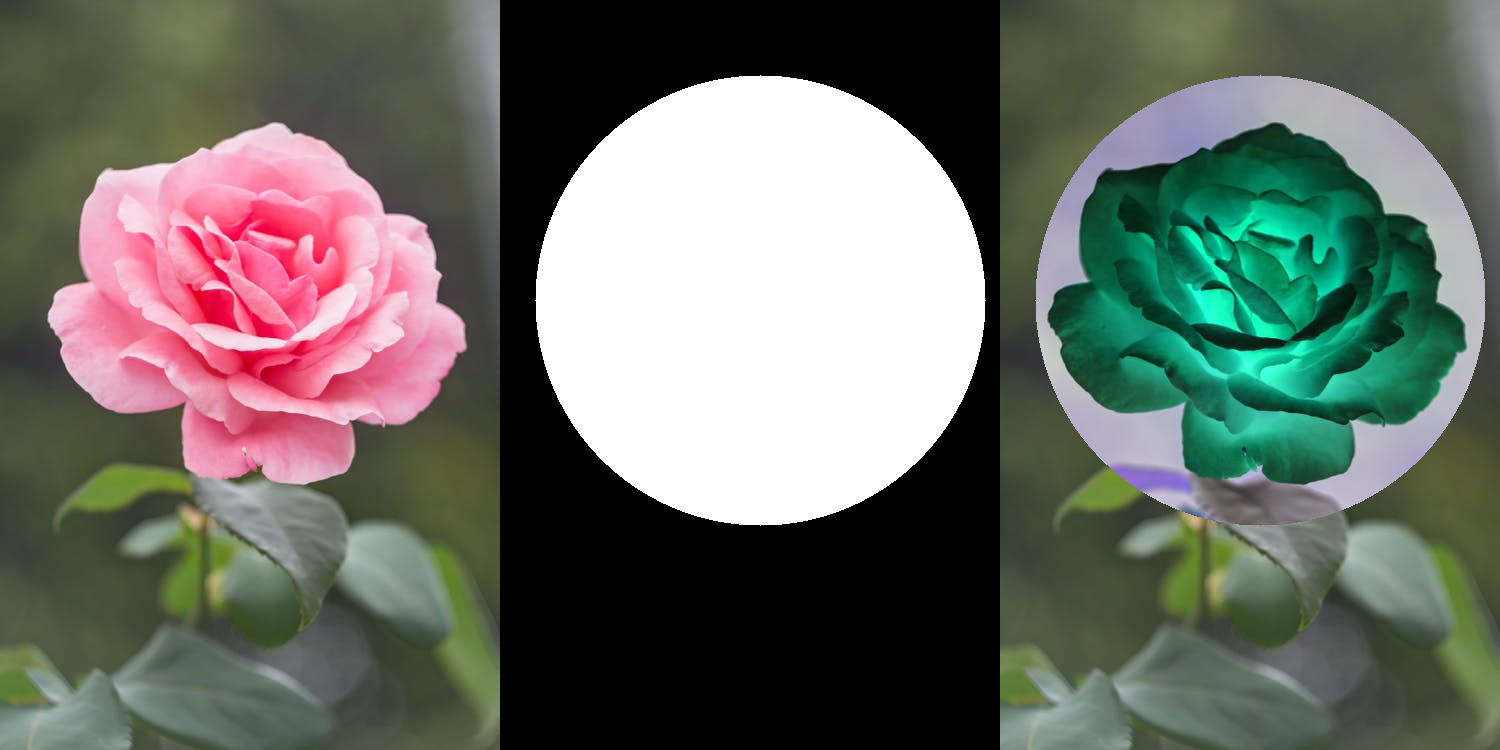

In [20]:
mask = np.zeros(rose.shape, dtype=np.uint8)
mask = cv.circle(mask, (260, 300), 225, (255,255,255), -1)

border = rose ^ mask #XOR atau Exclusive OR)

final_frame = cv.hconcat((rose, mask, border))
cv2_imshow(final_frame)